# Nearest Neighbors Graphics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('csv/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Find types in cuscat

In [92]:
total_types_series=df['custcat'].value_counts()
cuscat_total_types=total_types_series.to_frame()
#1 Basic-service, 2 E-Service customers,3 Plus Service,  4 Total Service, 
cuscat_types=np.asarray(['Plus Service','Basic-service','Total Service','E-Service customers'])
cuscat_total_types.insert(0,'Desc',cuscat_types)
display(cuscat_total_types)

,Desc,custcat
3,Plus Service,281
1,Basic-service,266
4,Total Service,236
2,E-Service customers,217


### Histrograms

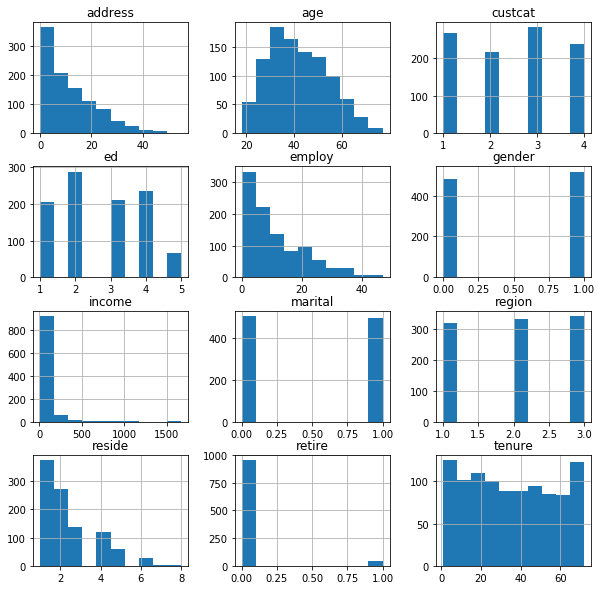

In [45]:
df.hist()
plt.show()


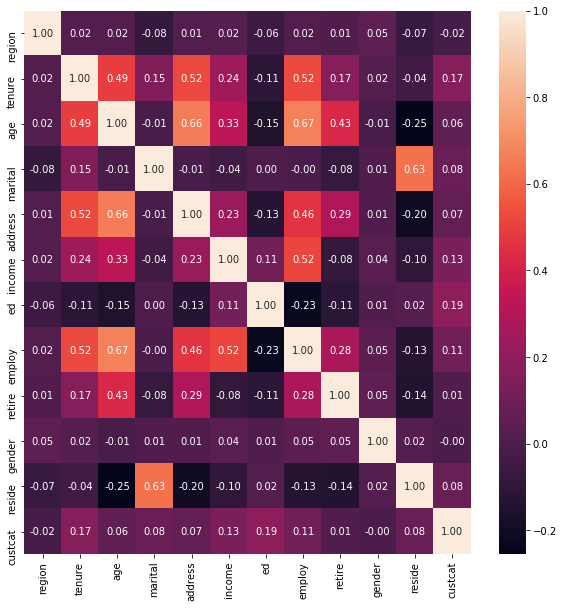

region     1.365551
tenure     3.454686
age        4.085732
marital    2.105856
address    3.594585
income     2.850151
ed         2.130696
employ     3.985892
retire     2.655005
gender     1.269112
reside     2.676406
custcat    1.933415
dtype: float64

In [93]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
def plot_correlation(data):
    rcParams['figure.figsize'] = 10, 10
    sns.heatmap(data.corr(),annot=True,fmt='.2f')
    plt.show()
plot_correlation(df) 
abosulte_data=np.absolute(df.corr())
abosulte_data=abosulte_data.sum(axis=1)
abosulte_data

### Plot densities

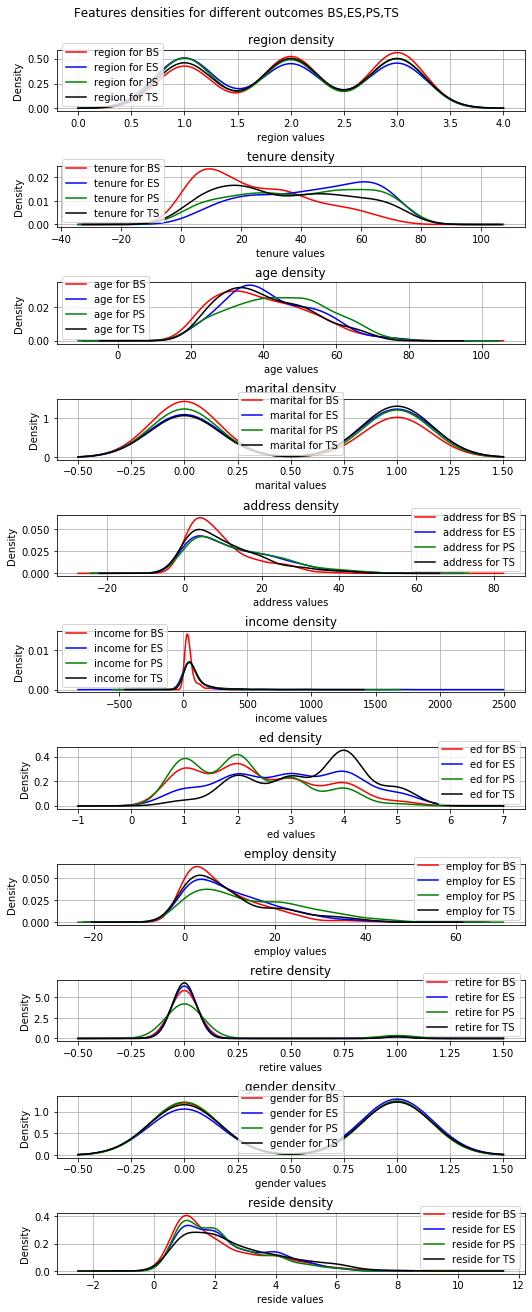

In [32]:
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
def plot_densities(data):
    rcParams['figure.figsize']=10,20
    outcome_bs = df[df['custcat'] == 1]
    outcome_es = df[df['custcat'] == 2]    
    outcome_ps = df[df['custcat'] == 3]
    outcome_ts = df[df['custcat'] == 4]
    columns_names = df.columns[df.columns!='custcat']
    fig,axs = plt.subplots(len(columns_names),1)
    fig.suptitle('Features densities for different outcomes BS,ES,PS,TS')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95, wspace = 0.2, hspace = 0.9)    
    index = 0
    for column_name in columns_names:        
        ax = axs[index]                
        outcome_bs[column_name].plot(kind='density',ax=ax,subplots=True,sharex=False,color='red',legend=True,label=column_name + ' for BS')                                
        outcome_es[column_name].plot(kind='density',ax=ax,subplots=True,sharex=False,color='blue',legend=True,label=column_name + ' for ES')                
        outcome_ps[column_name].plot(kind='density',ax=ax,subplots=True,sharex=False,color='green',legend=True,label=column_name + ' for PS')        
        outcome_ts[column_name].plot(kind='density',ax=ax,subplots=True,sharex=False,color='black',legend=True,label=column_name + ' for TS')                
        ax.set_xlabel(column_name+' values')
        ax.set_title(column_name+' density')
        ax.grid('on')
        index=index+1    
    plt.show()
plot_densities(df)
        
    

### Plot Graphic Clasification

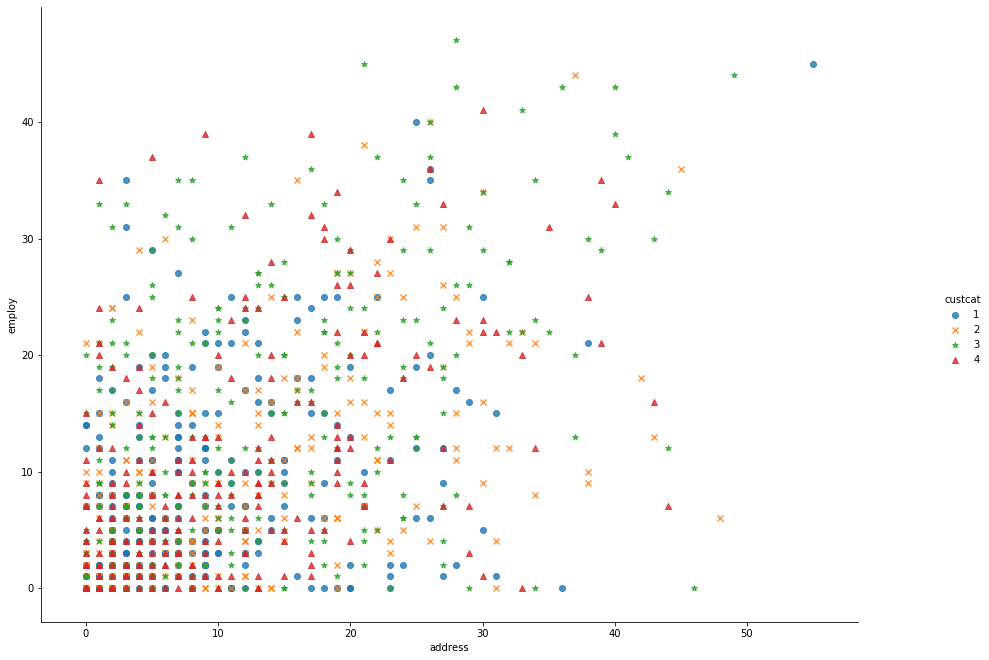

In [97]:
import seaborn as sns
sns.lmplot('address', 'employ', df, hue='custcat', fit_reg=False,markers=["o", "x","*","^"])
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

### Plot Graphic Clasification and Prediction

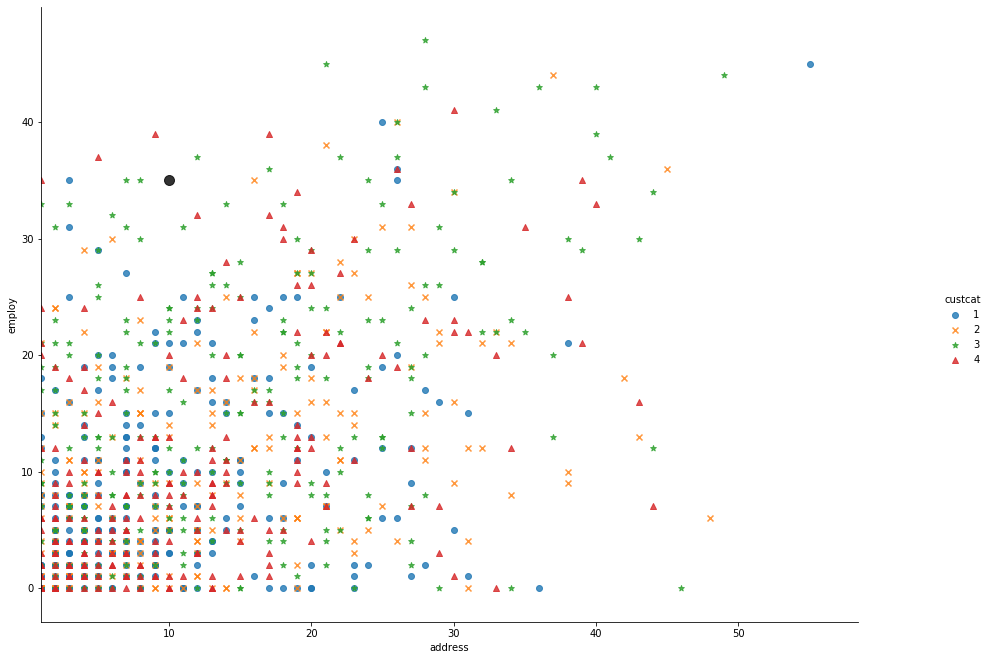

In [99]:
sns.lmplot('address', 'employ', df, hue='custcat', fit_reg=False,markers=["o", "x","*","^"])
ax = plt.gca()
ax.set_xlim(left=1)
x = np.asarray([10])
y =  np.asarray([35])
area = (10)**2  
plt.scatter(x, y,c='black', alpha=0.8,s=area)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()